In [1]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import sys
sys.path.append('../')
from containers import Ligand, Protein
from shared_paths import shared_paths, proteins
from score.scores import ScoreContainer
from score.prob_opt import PredictStructs
%matplotlib inline

# Docking status

In [16]:
print(proteins), len(proteins)

['B2AR', 'B1AR', 'DAT', 'PLAU', 'PTPN1', 'BACE1', 'TRPV1', 'MEK1', 'F10', 'SIGMAR1', 'MGLUR5', 'ELANE', '5HT2B', 'DHFR', 'SMO', 'BRD4', 'CHRM3', 'F11', 'MAPK14', 'A2AR', 'P00760', 'CDK2', 'NR3C2', 'JAK2', 'CHK1', 'GLUT1', 'VDR', 'PDE10A', 'PYGM', 'NR3C1', 'BRAF', 'SLC6A4', 'F2', 'AR', 'ERA', 'PLK1', 'HSP90AA1']


(None, 37)

In [15]:
for protein in proteins:
    
    prot = Protein(protein)
    pdb = [ligand for ligand in prot.lm.pdb[:21] if prot.lm.st not in ligand]
    docked = prot.lm.get_xdocked_ligands(20)
    print(protein, len(prot.lm.pdb))
    for ligand in pdb:
        if ligand not in docked:
            print(ligand, 'not docked')
  
    for ligand in docked:
        if ligand not in pdb:
            print(ligand, 'not in pdb??')

B2AR 8
B1AR 12
DAT 9
PLAU 28
PTPN1 39
BACE1 35
TRPV1 3
MEK1 33
3EQF_lig not docked
3ZLY_lig not in pdb??
F10 64
SIGMAR1 5
MGLUR5 5
ELANE 9
5HT2B 6
DHFR 35
SMO 7
4O9R_lig not docked
4QIN_lig not docked
BRD4 17
CHRM3 2
F11 14
MAPK14 25
A2AR 19
3QAK_lig not docked
P00760 86
CDK2 290
NR3C2 17
3VHU_lig not docked
4UDA_lig not docked
4UDB_lig not docked
5L7H_lig not docked
JAK2 62
CHK1 112
1NVR_lig not docked
2E9O_lig not in pdb??
GLUT1 3
VDR 37
PDE10A 24
PYGM 25
3EBP_lig not docked
3SYR_lig not in pdb??
NR3C1 19
1NHZ_lig not docked
3K23_lig not docked
BRAF 45
SLC6A4 5
F2 82
AR 21
2PNU_lig not docked
ERA 199
PLK1 12
HSP90AA1 59


# Ligand similarity

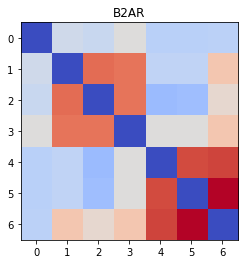

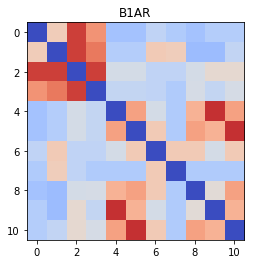

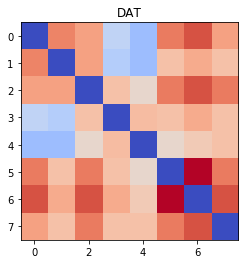

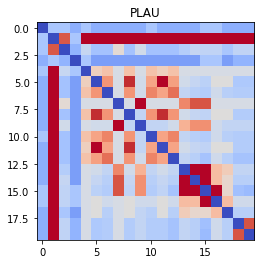

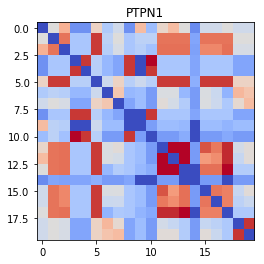

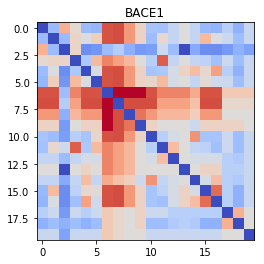

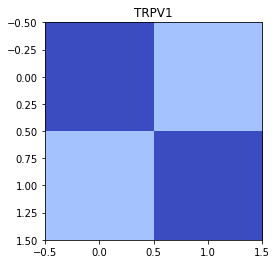

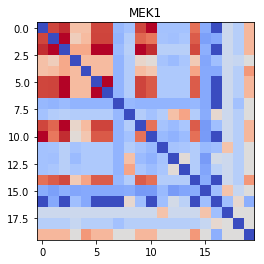

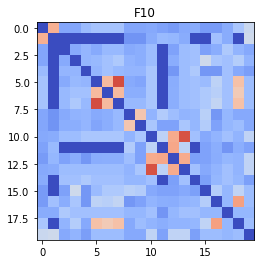

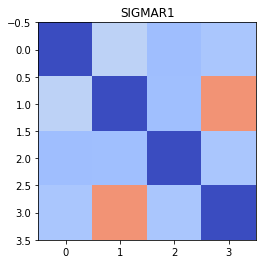

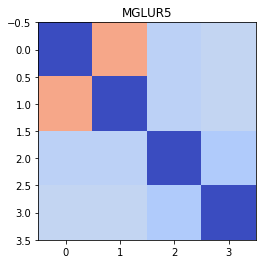

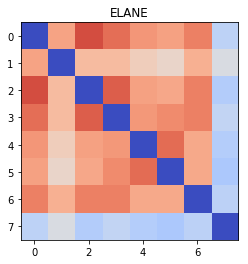

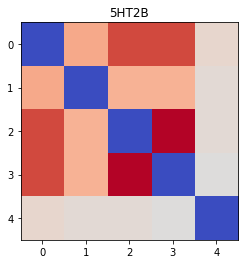

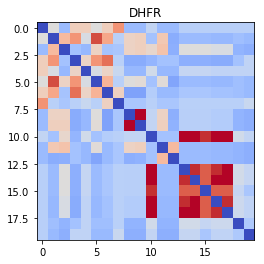

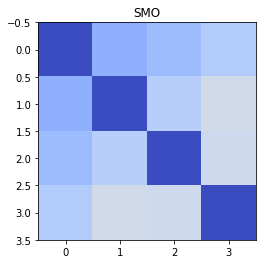

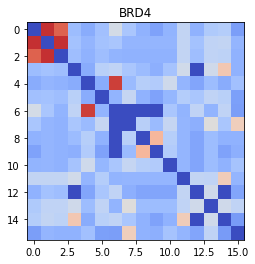

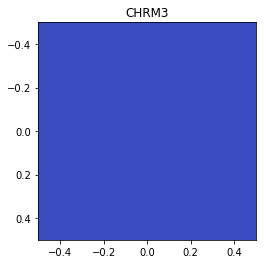

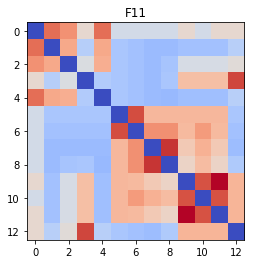

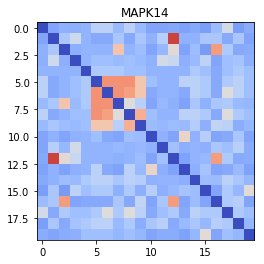

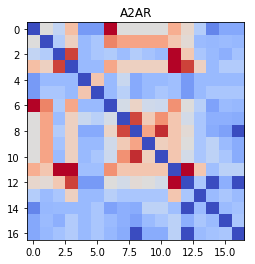

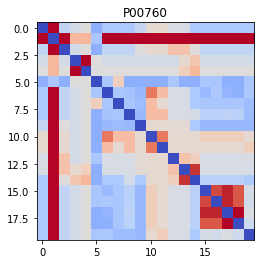

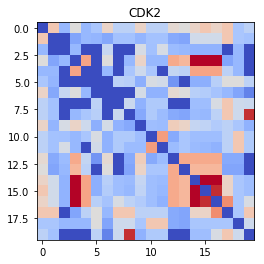

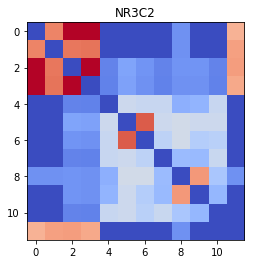

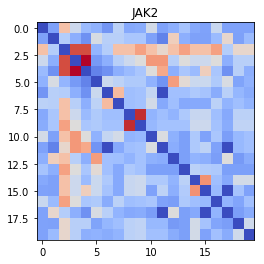

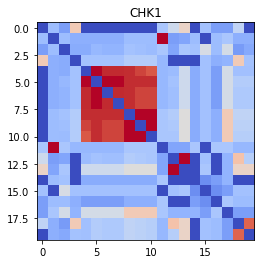

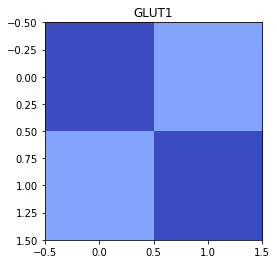

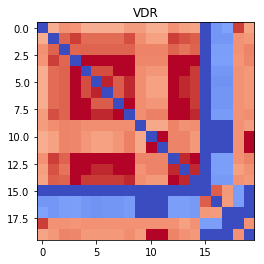

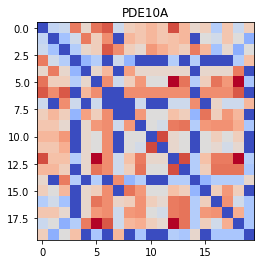

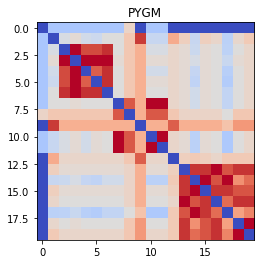

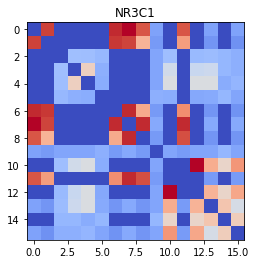

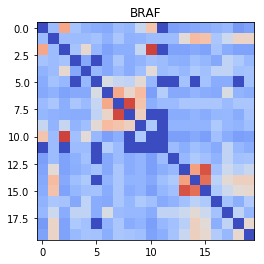

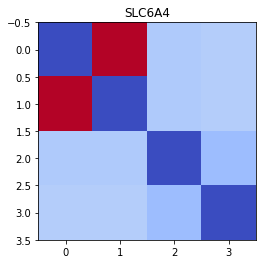

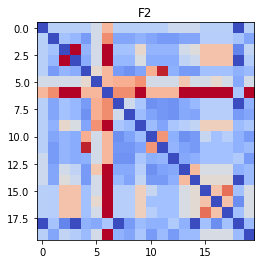

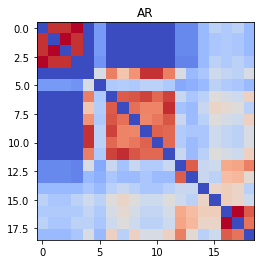

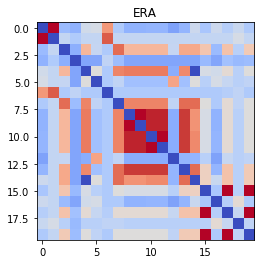

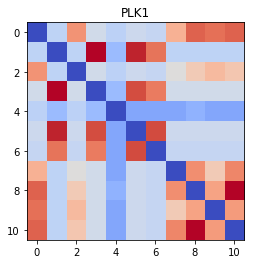

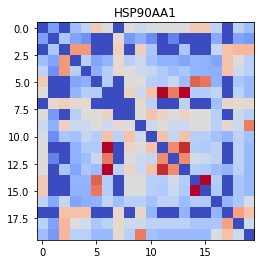

In [22]:
pdb = []
for protein in proteins:
    prot = Protein(protein)
    docked = prot.lm.get_xdocked_ligands(20)
    prot.load_docking(docked, load_mcss=True)
    
    X = np.zeros((len(docked), len(docked)))
    for i, ligand1 in enumerate(docked):
        for j, ligand2 in enumerate(docked):
            if ligand1 == ligand2: continue
            m = prot.lm.mcss.get_mcss_size(ligand1, ligand2)
            
            if m is not None:
                X[i, j] = m
    plt.imshow(X, vmin = 0, vmax = 1, cmap = 'coolwarm')
    plt.title(protein)
    plt.show()
    
    
    pdb += list(np.concatenate([X[i+1:, i] for i in range(len(docked))]))

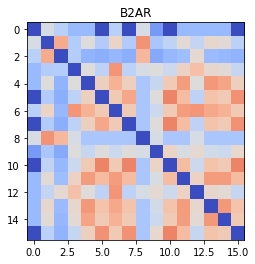

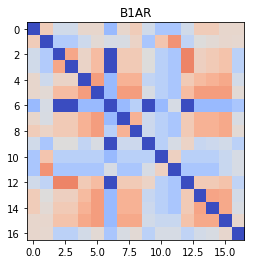

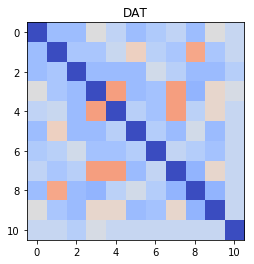

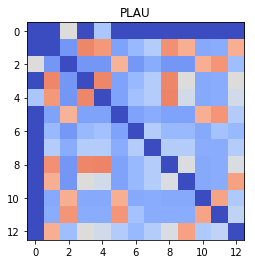

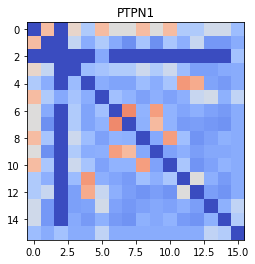

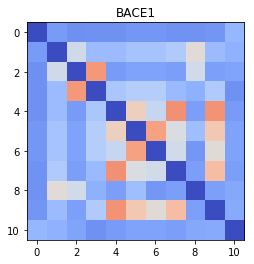

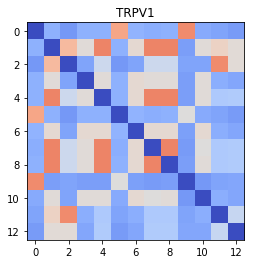

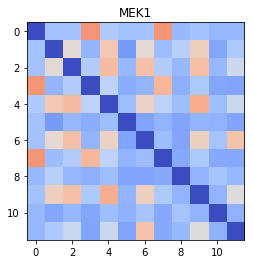

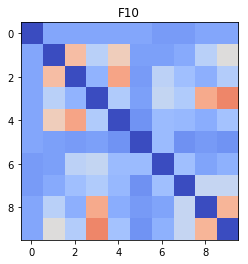

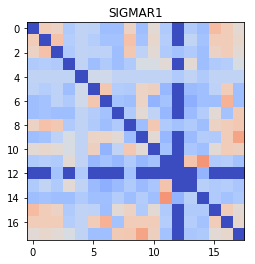

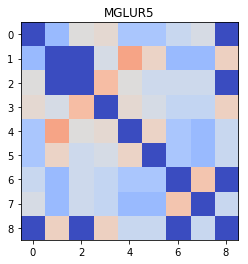

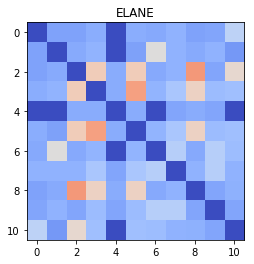

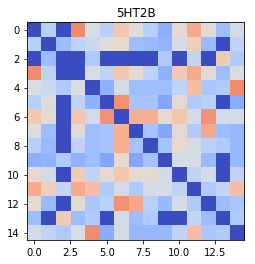

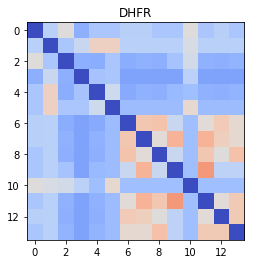

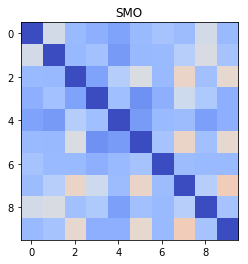

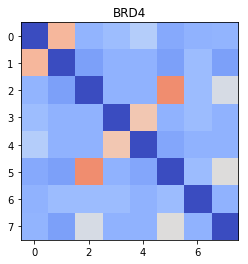

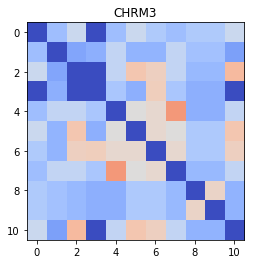

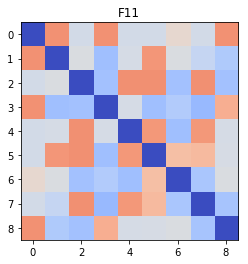

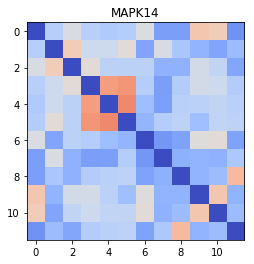

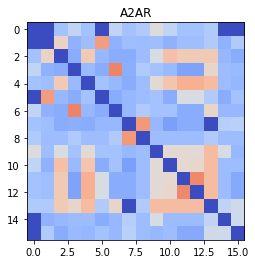

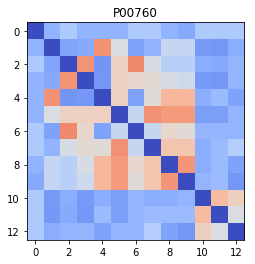

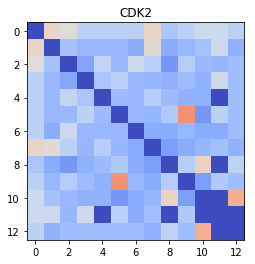

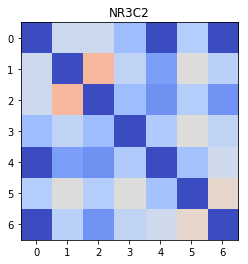

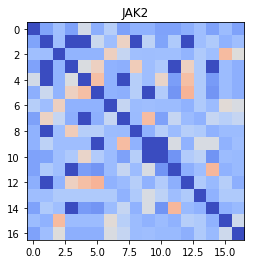

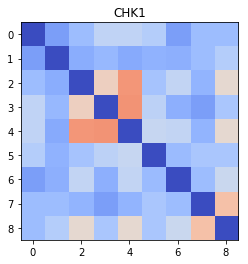

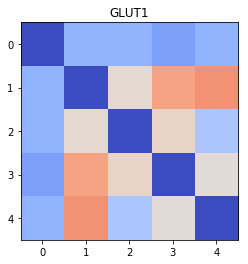

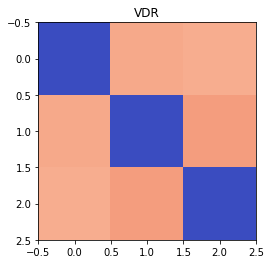

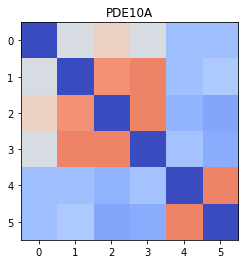

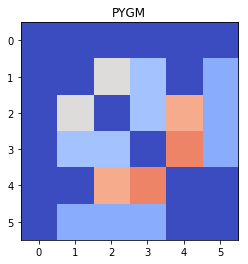

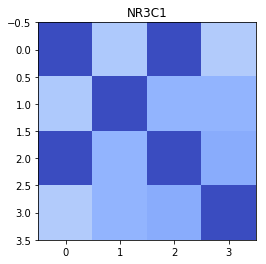

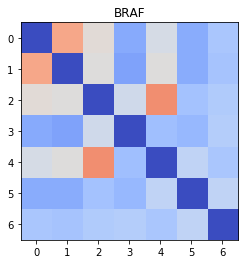

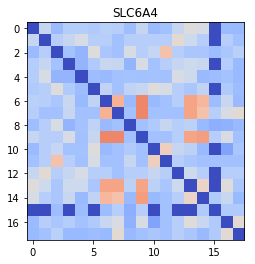

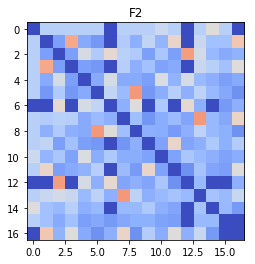

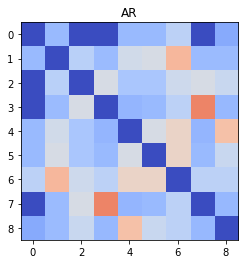

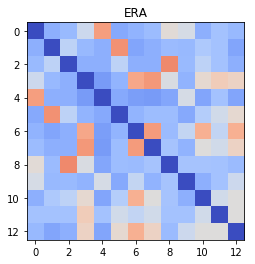

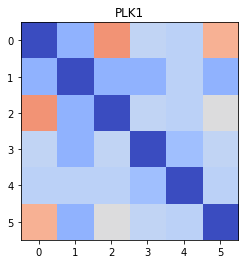

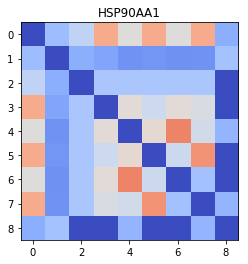

In [2]:
involving_query, not_involving_query = [], []
for protein in proteins:
    prot = Protein(protein)
    query = prot.lm.get_xdocked_ligands(1)[0]
    helpers = prot.lm.get_helpers(query, 'best_affinity.txt', 30)
    docked = [query]
    prot.load_docking(docked+helpers, load_mcss=True)
    for helper in helpers:
        sim = False
        for ligand in docked:
            sim = sim or prot.lm.mcss.get_mcss_size(helper, ligand) > 0.8
        if n ot sim:
            docked += [helper]
    X = np.zeros((len(docked), len(docked)))
    for i, ligand1 in enumerate(docked):
        for j, ligand2 in enumerate(docked):
            if ligand1 == ligand2: continue
            m = prot.lm.mcss.get_mcss_size(ligand1, ligand2)

            if m is not None:
                X[i, j] = m
    plt.imshow(X, vmin = 0, vmax = 1, cmap = 'coolwarm')
    plt.title(protein)
    plt.show()
    
    involving_query += list(X[1:, 0])
    not_involving_query += list(np.concatenate([X[i+1:, i] for i in range(1, len(docked))]))

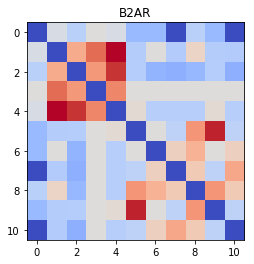

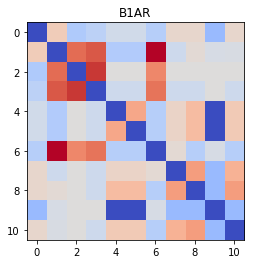

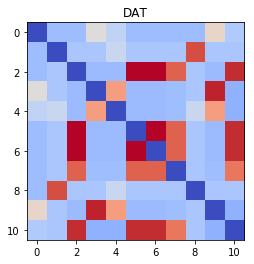

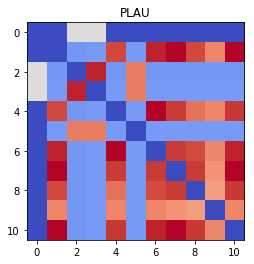

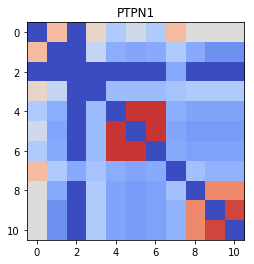

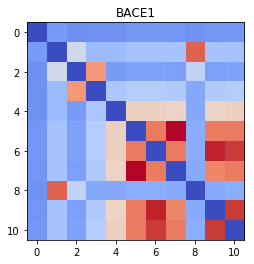

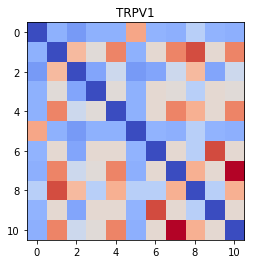

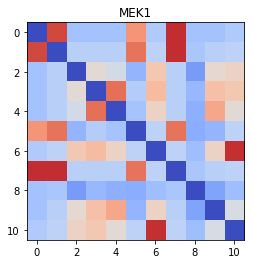

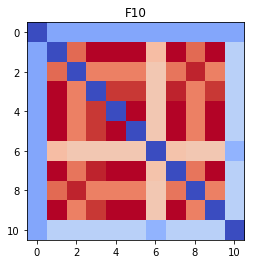

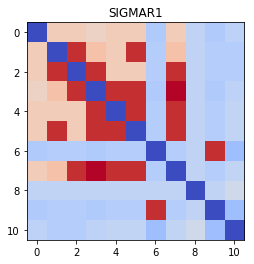

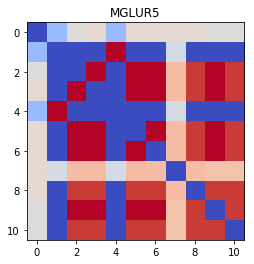

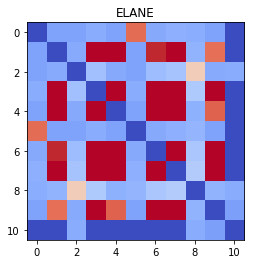

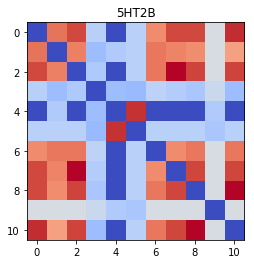

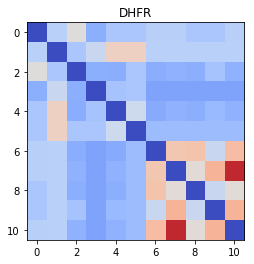

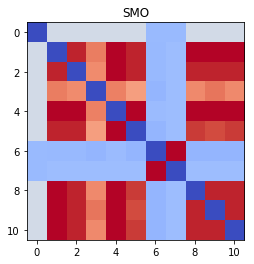

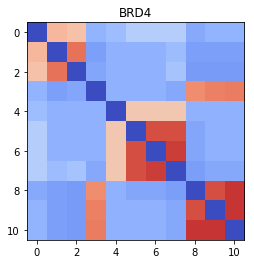

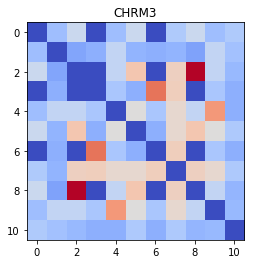

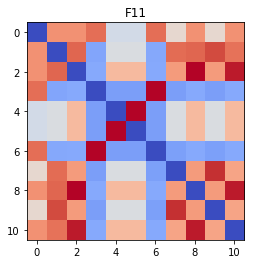

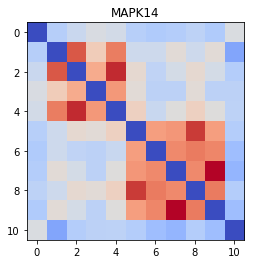

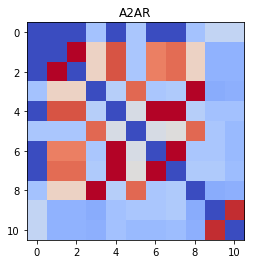

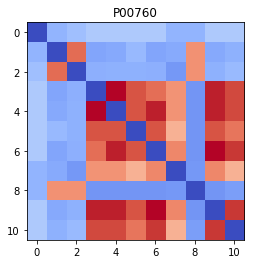

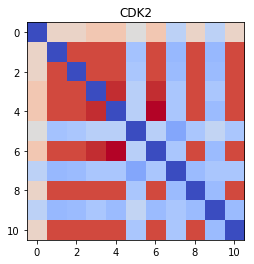

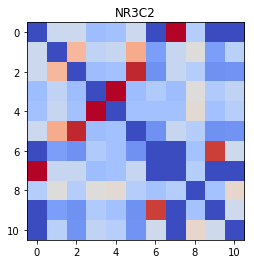

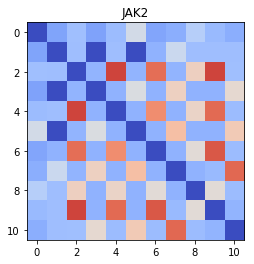

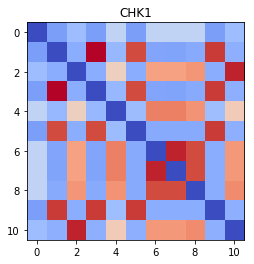

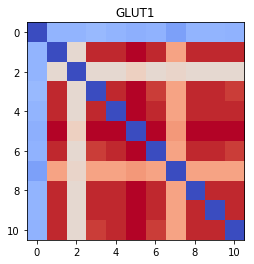

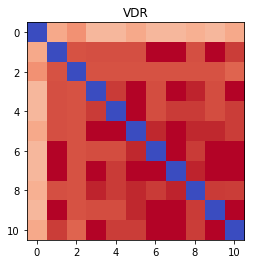

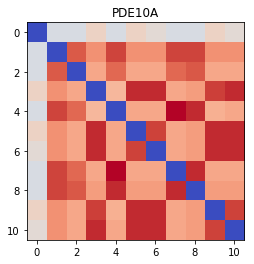

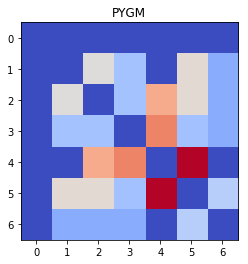

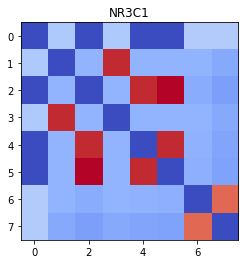

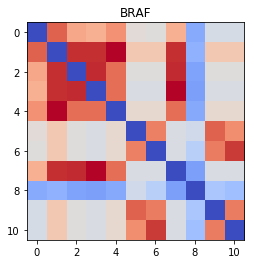

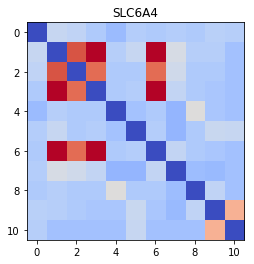

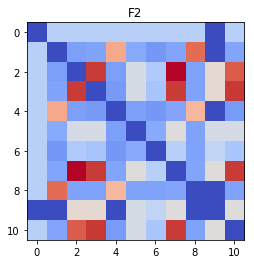

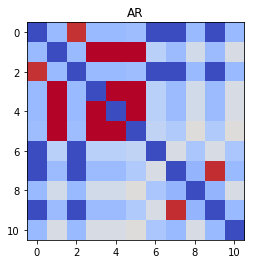

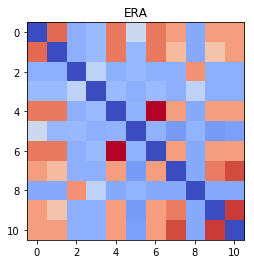

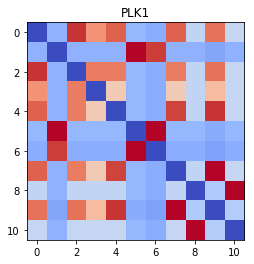

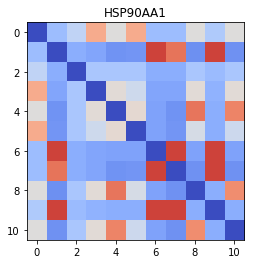

In [23]:
involving_query, not_involving_query = [], []
for protein in proteins:
    prot = Protein(protein)
    query = prot.lm.get_xdocked_ligands(1)[0]
    helpers = prot.lm.get_helpers(query, 'best_affinity.txt', 10)
    docked = [query] + helpers
    prot.load_docking(docked, load_mcss=True)
    
    X = np.zeros((len(docked), len(docked)))
    for i, ligand1 in enumerate(docked):
        for j, ligand2 in enumerate(docked):
            if ligand1 == ligand2: continue
            m = prot.lm.mcss.get_mcss_size(ligand1, ligand2)
            
            if m is not None:
                X[i, j] = m
    plt.imshow(X, vmin = 0, vmax = 1, cmap = 'coolwarm')
    plt.title(protein)
    plt.show()
    
    involving_query += list(X[1:, 0])
    not_involving_query += list(np.concatenate([X[i+1:, i] for i in range(1, len(docked))]))

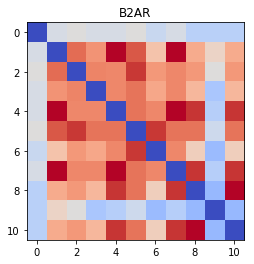

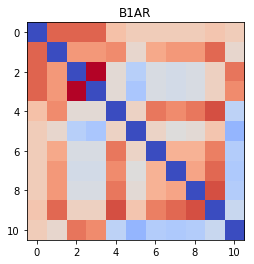

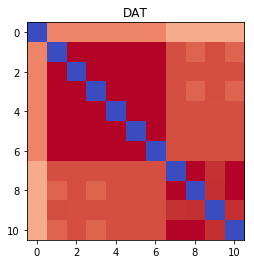

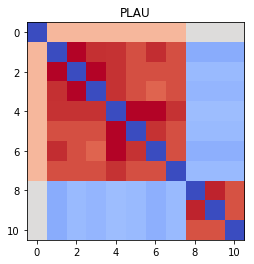

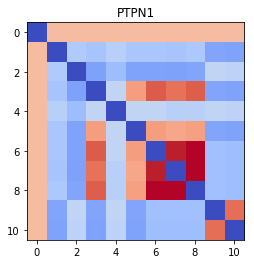

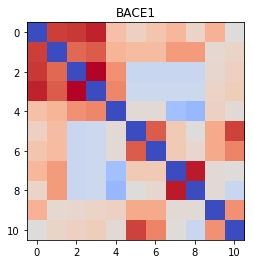

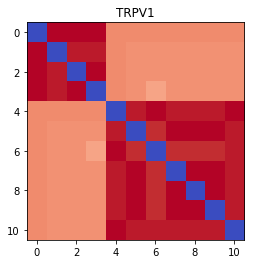

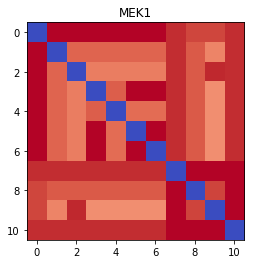

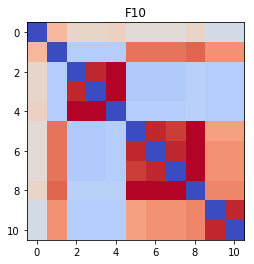

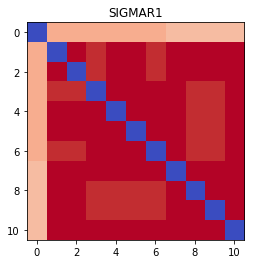

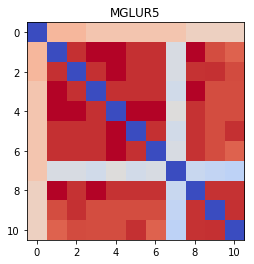

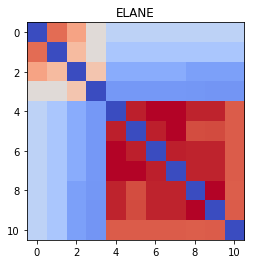

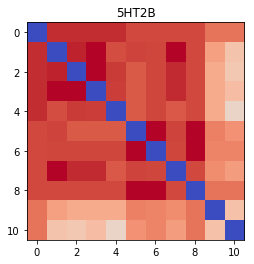

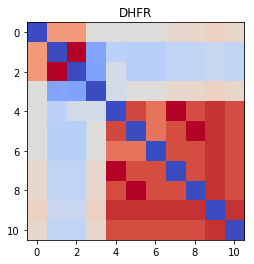

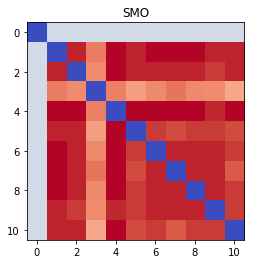

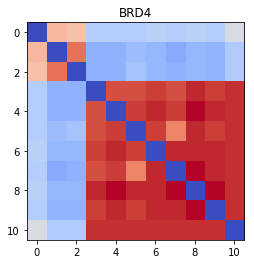

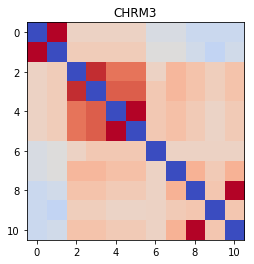

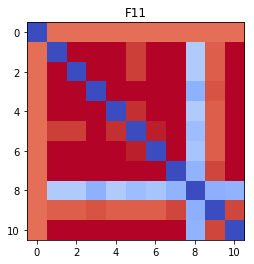

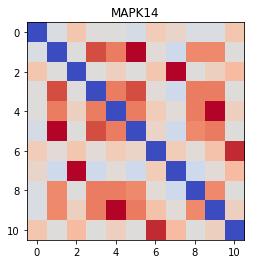

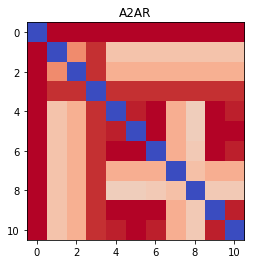

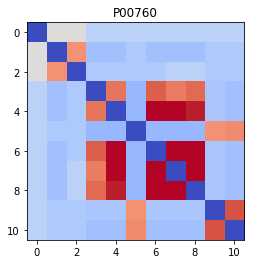

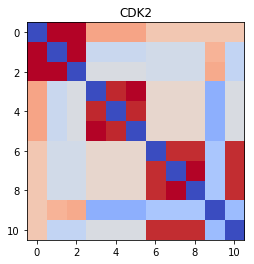

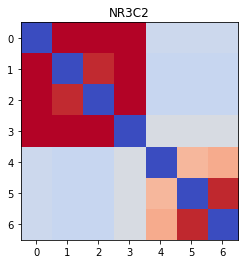

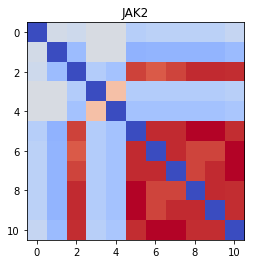

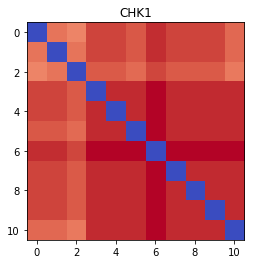

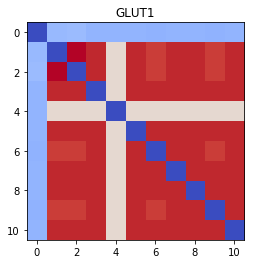

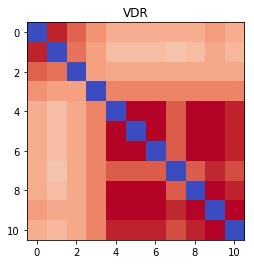

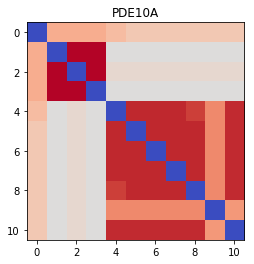

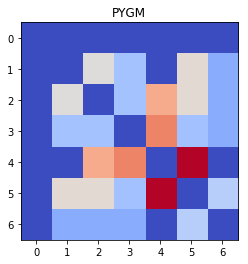

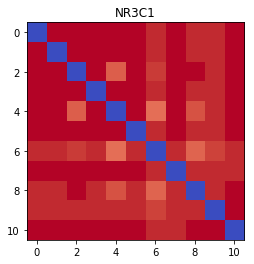

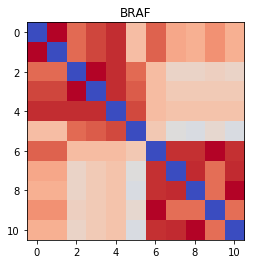

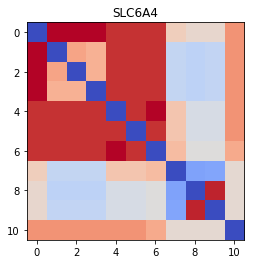

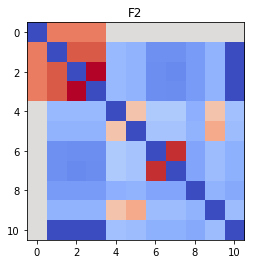

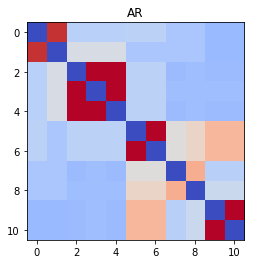

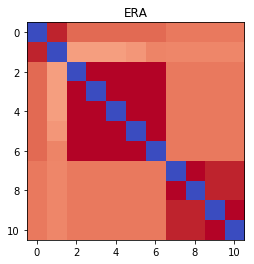

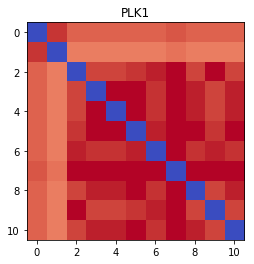

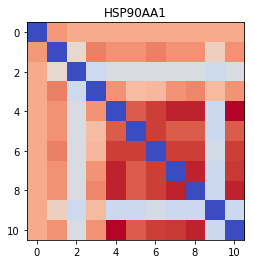

In [25]:
mcss_involving_query, mcss_not_involving_query = [], []
for protein in proteins:
    prot = Protein(protein)
    query = prot.lm.get_xdocked_ligands(1)[0]
    helpers = prot.lm.get_helpers(query, 'best_mcss.txt', 10)
    docked = [query] + helpers
    prot.load_docking(docked, load_mcss=True)
    
    X = np.zeros((len(docked), len(docked)))
    for i, ligand1 in enumerate(docked):
        for j, ligand2 in enumerate(docked):
            if ligand1 == ligand2: continue
            m = prot.lm.mcss.get_mcss_size(ligand1, ligand2)
            
            if m is not None:
                X[i, j] = m
    plt.imshow(X, vmin = 0, vmax = 1, cmap = 'coolwarm')
    plt.title(protein)
    plt.show()
    
    mcss_involving_query += list(X[1:, 0])
    mcss_not_involving_query += list(np.concatenate([X[i+1:, i] for i in range(1, len(docked))]))

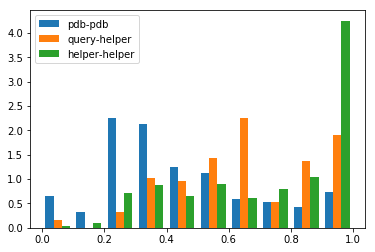

In [26]:
plt.hist([pdb, mcss_involving_query, mcss_not_involving_query], normed=True, label=['pdb-pdb', 'query-helper', 'helper-helper'])
plt.legend()
plt.show()

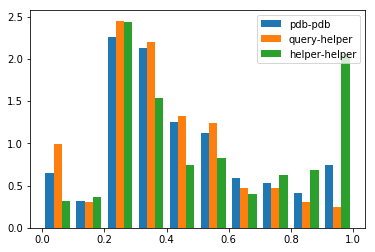

In [24]:
plt.hist([pdb, involving_query, not_involving_query], normed=True, label=['pdb-pdb', 'query-helper', 'helper-helper'])
plt.legend()
plt.show()

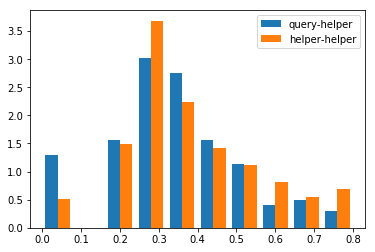

In [5]:
plt.hist([involving_query, not_involving_query], normed=True, label=['query-helper', 'helper-helper'])
plt.legend()
plt.show()